<a href="https://colab.research.google.com/github/DiegoRinconP/Mineria_de_datos/blob/main/Visualizacion_Equipo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica II: Visualización de Datos
**Equipo**: 2

**Grupo**: 002 Miércoles

**Integrantes**: 
*   1850231 Cid Sanabria Dulce Ximena
*   1851895 Ortiz Cruz Jaclyn Lizeth
*   1849687 Rincón Pacheco Diego Alejandro
*   1854410 Serrano Caballero Lizeth

#**Datos**#
A continuación se importan las librerías a utilizar, al igual que las bases de datos.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
bd1=pd.read_csv('/content/summer-products-with-rating-and-performance_2020-08.csv') #se manda llamar la base de datos principal
bd2=pd.read_csv('/content/Amazon_Best_Seller_2021_June.csv') #se manda llamar la base de datos secundaria

# **Base de datos principal**
Sales of summer clothes in E-commerce Wish

https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish

### **Limpieza de Datos**

Primero que nada, tenemos que limpiar nuestra base de datos para un mejor manejo.

In [3]:
bd1.isnull().sum() #devuleve la lista de columnas y la cantidad de datos nulos por columna

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

Se eliminan las columnas que contienen datos nulos, ya que no son necesarias para lo que se quiere analizar.

In [4]:
bd1.drop(["rating_five_count","rating_four_count","rating_three_count","rating_two_count","rating_one_count",
         "product_variation_size_id","has_urgency_banner","urgency_text","origin_country",
         "product_color","merchant_profile_picture","merchant_name","merchant_info_subtitle"],axis=1,inplace=True)

Después, se eliminan todas aquellas columnas que no son necesarias para nuestros objetivos.

In [5]:
bd1.drop(['title','title_orig','currency_buyer','uses_ad_boosts','rating_count','badges_count','badge_local_product','badge_product_quality',
       'badge_fast_shipping','tags','product_variation_inventory','shipping_option_name','shipping_is_express',"countries_shipped_to",
       'inventory_total','merchant_title','merchant_rating_count','merchant_rating','merchant_id','merchant_has_profile_picture','product_url',
       'product_picture','theme','crawl_month'],axis=1,inplace=True)


En la siguiente línea de código se cambian el nombre de las columnas de la base de datos, con uso del atributo rename.

In [6]:
bd1.rename(columns={'price':'Precio_wish','retail_price':'Precio_externo','units_sold':'No._de_ventas',
                   'shipping_option_price':'Precio_envio','product_id':'Id_producto'},inplace=True) #con el inplace se hace el cambio "permanente"

#https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas

Se creó una nueva columna en la cual se calcula la diferencia entre los valores de la columna Precio_wish con los de Precio_externo.

In [7]:
bd1["Diferencia"]=bd1.Precio_externo-bd1.Precio_wish

Por último, se ordenaron las columnas de la base de datos para una mejor visualización. 

In [8]:
bd1["rating"]=bd1["rating"].round(decimals=0).astype(int)
bd1[["Id_producto","Precio_externo","Precio_wish","Diferencia","No._de_ventas","rating","Precio_envio"]]

,Id_producto,Precio_externo,Precio_wish,Diferencia,No._de_ventas,rating,Precio_envio
0,5e9ae51d43d6a96e303acdb0,14,16.00,-2.00,100,4,4
1,58940d436a0d3d5da4e95a38,22,8.00,14.00,20000,3,2
2,5ea10e2c617580260d55310a,43,8.00,35.00,100,4,3
3,5cedf17ad1d44c52c59e4aca,8,8.00,0.00,5000,4,2
4,5ebf5819ebac372b070b0e70,3,2.72,0.28,100,3,1
...,...,...,...,...,...,...,...
1568,5d5fadc99febd9356cbc52ee,9,6.00,3.00,10000,4,2
1569,5eccd22b4497b86fd48f16b4,56,2.00,54.00,100,3,1
1570,5e74be96034d613d42b52dfe,19,5.00,14.00,100,4,2
1571,5eda07ab0e295c2097c36590,11,13.00,-2.00,100,2,3


### **Estadística básica de los datos**


A continuación, se muestra un resumen estadístico de las ventas de los productos de verano de Wish.

In [9]:
bd1['No._de_ventas'].describe()

count      1573.000000
mean       4339.005086
std        9356.539302
min           1.000000
25%         100.000000
50%        1000.000000
75%        5000.000000
max      100000.000000
Name: No._de_ventas, dtype: float64

In [10]:
sa=bd1['No._de_ventas'].cumsum()
print("La suma acumulada de las ventas fila por fila es :\n",sa)
suma=bd1['No._de_ventas'].sum()
print("\nLa suma de ventas es : ",round(suma,2))
prom=bd1['No._de_ventas'].mean()
print("El promedio de ventas es : ",round(prom,2))
cont=bd1['No._de_ventas'].count()
print("El número total de datos es : ",round(cont,2))
minimo=bd1['No._de_ventas'].min()
print("El valor mínimo de ventas es : ",round(minimo,2))
maximo=bd1['No._de_ventas'].max()
print("El valor máximo de ventas es : ",round(maximo,2))
mediana=bd1['No._de_ventas'].median()
print("El valor mediano de ventas es : ",round(mediana,2))
varianza=bd1['No._de_ventas'].var()
print("La varianza es : ",round(varianza,4))
desv=bd1['No._de_ventas'].std()
print("La desviación estándar es : ",round(desv,4))
sesgo=bd1['No._de_ventas'].skew()
print("El sesgo es : ",round(sesgo,4))
curtosis=bd1['No._de_ventas'].kurt()
print("La curtosis es : ",round(curtosis,4))

La suma acumulada de las ventas fila por fila es :
 0           100
1         20100
2         20200
3         25200
4         25300
         ...   
1568    6824855
1569    6824955
1570    6825055
1571    6825155
1572    6825255
Name: No._de_ventas, Length: 1573, dtype: int64

La suma de ventas es :  6825255
El promedio de ventas es :  4339.01
El número total de datos es :  1573
El valor mínimo de ventas es :  1
El valor máximo de ventas es :  100000
El valor mediano de ventas es :  1000.0
La varianza es :  87544827.7112
La desviación estándar es :  9356.5393
El sesgo es :  5.6248
La curtosis es :  45.5681


La correlación de los datos es la siguiente.

In [11]:
bd1.corr()

,Precio_wish,Precio_externo,No._de_ventas,rating,Precio_envio,Diferencia
Precio_wish,1.000000,0.304748,-0.024815,0.052910,0.872580,0.180939
Precio_externo,0.304748,1.000000,0.012638,0.017067,0.262516,0.991853
No._de_ventas,-0.024815,0.012638,1.000000,0.050087,-0.030987,0.016369
rating,0.052910,0.017067,0.050087,1.000000,0.073979,0.010546
Precio_envio,0.872580,0.262516,-0.030987,0.073979,1.000000,0.154373
Diferencia,0.180939,0.991853,0.016369,0.010546,0.154373,1.000000


La covarianza de los datos es la siguiente.

In [12]:
bd1.cov()

,Precio_wish,Precio_externo,No._de_ventas,rating,Precio_envio,Diferencia
Precio_wish,15.460858,36.377119,-9.129390e+02,0.115077,3.514627,20.916261
Precio_externo,36.377119,921.599851,3.589864e+03,0.286581,8.163664,885.222732
No._de_ventas,-912.938959,3589.864307,8.754483e+07,259.222890,-296.997304,4502.803266
rating,0.115077,0.286581,2.592229e+02,0.305958,0.041918,0.171504
Precio_envio,3.514627,8.163664,-2.969973e+02,0.041918,1.049336,4.649037
Diferencia,20.916261,885.222732,4.502803e+03,0.171504,4.649037,864.306472


###**Gráficas datos univariantes**###



* Grafica de barras y datos categoricos

A continuación, analizaremos visualmente el número de ventas de Wish.

In [13]:
bd1['No._de_ventas'].unique()

array([   100,  20000,   5000,     10,  50000,   1000,  10000, 100000,
           50,      1,      7,      2,      3,      8,      6])

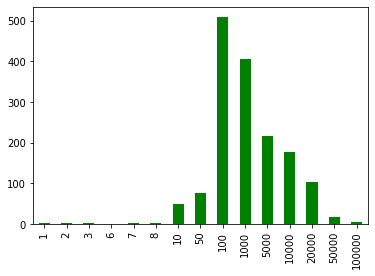

In [14]:
bd1['No._de_ventas'].value_counts().sort_index().plot.bar(color='g')

Claramente, la mayoría de los productos de wish alcanzan entre 100 y 1000 ventas. Pero ahora queremos ver la proporcion en el eje de las y, en lugar de la cantidad. 

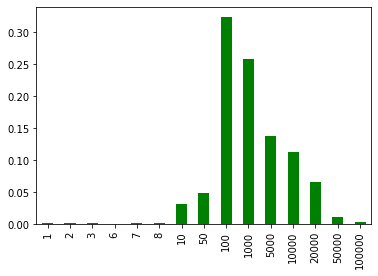

In [15]:
(bd1['No._de_ventas'].value_counts() / len(bd1)).sort_index().plot.bar(color='g')


En la gráfica podemos ver que los productos que tienen 100 ventas representan más del 30% del número de ventas totales.

*Nuestra base de datos no cuenta con datos categóricos, por lo tanto, no se pueden realizar gráficas de barras con datos categóricos.*

**Pregunta 1.**

¿Que representan los datos de la gráfica de arriba?

Representa la proporción del número de ventas de los productos de verano de Wish.

* Gráfica de lineas

A continuación, analizaremos visualmente el precio externo de los productos.

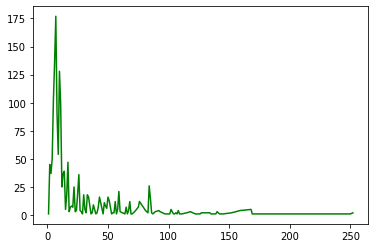

In [16]:
bd1['Precio_externo'].value_counts().sort_index().plot.line(color='g')

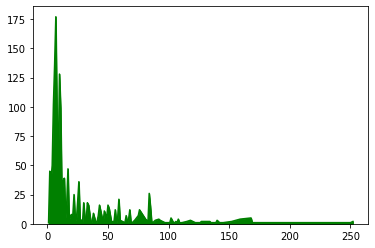

In [17]:
bd1['Precio_externo'].value_counts().sort_index().plot.area(color='g')

En las gráficas de arriba, se muestra claramente que la mayoría de los productos cuentan con un precio externo menor a $100.

* Histogramas

En esta sección trabajaremos con los precios Wish.

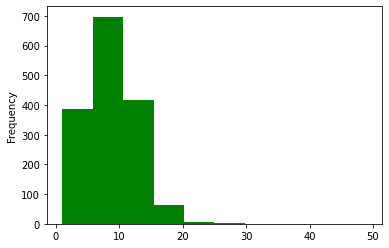

In [18]:
bd1['Precio_wish'].plot.hist(color='g')

Como podemos observar, la gran mayoría de los productos tienen un costo menor a $20 y no se puede ver detalladamente los intervalos.

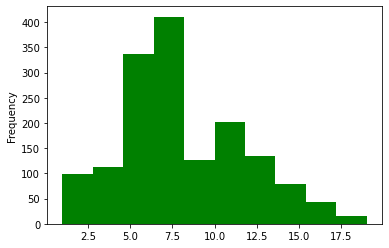

In [19]:
bd1[bd1['Precio_wish'] <20]['Precio_wish'].plot.hist(color='g')


Después de haber reducido la gráfica a precios menores a 20 dólares, podemos notar que alrededor de 400 productos cuentan aproximadamente con un precio de $7.5.

### **Gráficas de datos bi-variantes**



* Scatter plot

En la siguiente gráfica analizaremos el precio Wish con el precio de envio.

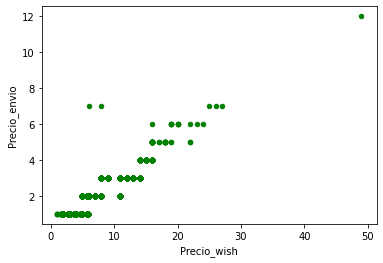

In [20]:
bd1.plot.scatter(x='Precio_wish', y='Precio_envio',color='g')

Analizaremos mejor una muestra de 100 datos debido a que no se aprecia muy bien la gráfica al usar todos los datos.

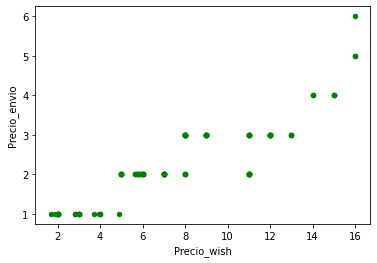

In [21]:
bd1.sample(100).plot.scatter(x='Precio_wish', y='Precio_envio',color='g')

Podemos observar en la gráfica como entre mayor es el precio del producto, mayor es el costo de envío.

* Hexplot

A continuación, seguiremos analizando el precio Wish con el rating del producto.

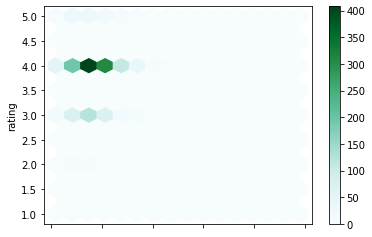

In [22]:
bd1.plot.hexbin(x='Precio_wish', y='rating', gridsize=15)

Aqui podemos ver que se hace un pequeño agrupamiento de precios Wish con rating de 4.

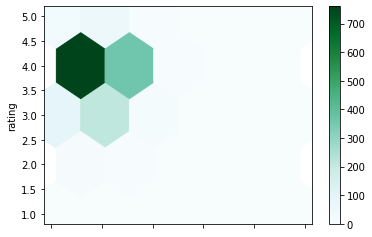

In [23]:
bd1.plot.hexbin(x='Precio_wish', y='rating', gridsize=5)

Cambiandole el tamaño del hexágono, podemos notar como sigue prevaleciendo el color verde oscuro en el rating 4. 

* Stacked plots

A continuación analizaremos el precio wish, el precio externo y la diferencia de precios.

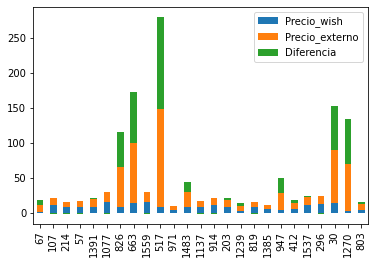

In [24]:
aa=bd1[['Precio_wish', 'Precio_externo', 'Diferencia']]
aa.sample(25).plot.bar(stacked=True)

*No se puede realizar la gráfica de lineas ni de area ya que los diferentes tipos precios de nuestra base de datos no cuentan con un patrón y hay mucha variedad entre estos. Se intentó poner uno de los precios wish de forma ascendente pero, el precio externo no sigue el mismo comportamiento.*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


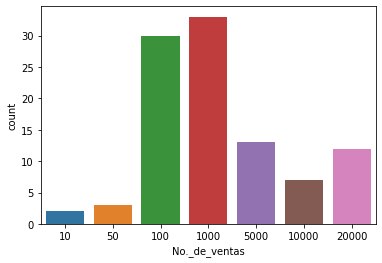

In [25]:
sns.countplot(bd1['No._de_ventas'].sample(100))

En lugar de la grafica de barras de matplotlib, seaborn tiene countplot y podemos ver como el número de ventas que tiene el mayor frecuencia es de 100 y 1000.

A continuación, podemos observar la gráfica KDE del precio Wish menor a $20.

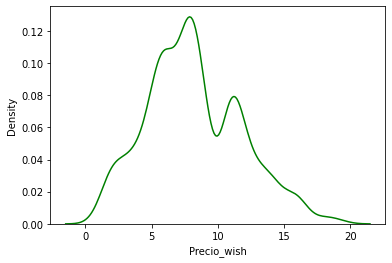

In [26]:
sns.kdeplot(bd1.query('Precio_wish<20').Precio_wish,color="g")

Comparando la gráfica de abajo con la de arriba, podemos ver como en la gráfica de arriba se eliminó el ruido de los datos y la linea es mas "fina".

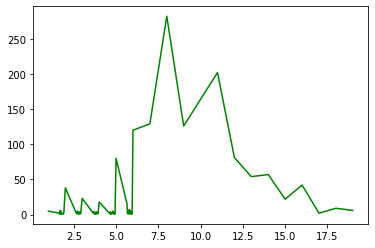

In [27]:
bd1[bd1['Precio_wish'] < 20]['Precio_wish'].value_counts().sort_index().plot.line(color="g")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


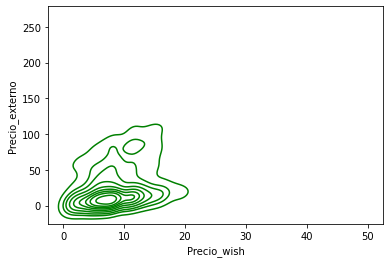

In [28]:
sns.kdeplot(bd1["Precio_wish"],bd1["Precio_externo"],color="g")
#https://es.acervolima.com/2021/02/09/seaborn-kdeplot-una-guia-completa/

Hay una alta concentración de datos cuando el precio Wish está entre 0-10 dólares y cuando el precio externo está entre 0-25 dólares.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


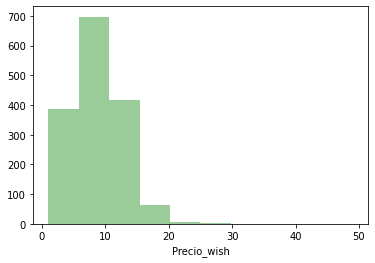

In [29]:
sns.distplot(bd1['Precio_wish'], bins=10, kde=False,color="g")

Como podemos observar las gráficas de distancias muestran la misma información que los histogramas de la librería matplotlib, la mayoría de los productos están a $10.

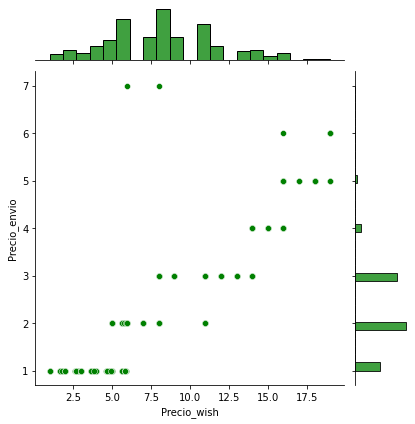

In [30]:
sns.jointplot(x='Precio_wish', y='Precio_envio', data=bd1[bd1['Precio_wish'] < 20],color="g")

La gráfica anterior muestra un scatterplot pero con histogramas de los datos en cada axis de la grafica. El histograma del precio de envío está sesgada a un lado, mismo lado donde podemos encontrar mas puntos en el scatterplot.

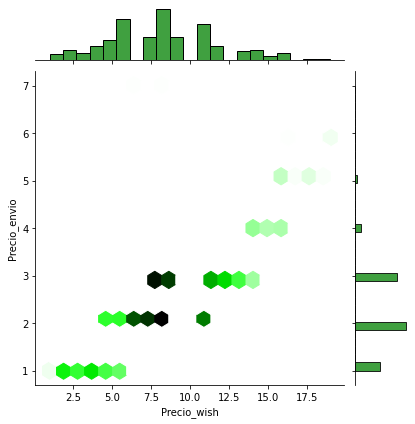

In [31]:
sns.jointplot(x='Precio_wish',y='Precio_envio',data=bd1[bd1['Precio_wish'] < 20],kind='hex',gridsize=20, color="g")

La gráfica anterior muestra un hexplot pero con histogramas de los datos en cada axis de la grafica. Encontramos varios datos con un precio Wish de 7.5 dólares aproximadamente cuentan con un envío de 2-3 dólares.

* Boxplots

A continuación, graficaremos el precio de wish y el rating.

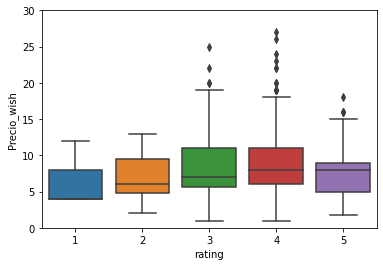

In [32]:
y = bd1[bd1.rating.isin(bd1.rating.value_counts().index)]
sns.boxplot(x='rating',y='Precio_wish',data=y) 
plt.ylim(0,30)
plt.show()

Aqui podemos observar los cuartiles de los datos, así como la presencia de datos atípicos entre el rating y el precio Wish.

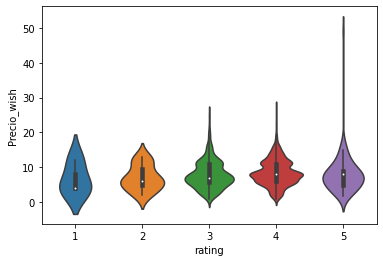

In [33]:
sns.violinplot(
    x='rating',
    y='Precio_wish',
    data=bd1[bd1.rating.isin(bd1.rating.value_counts().index)]
)

La gráfica anterior se utiliza para visualizar la distribución de los datos y su densidad de probabilidad. Por ejemplo, en la gráfica morada se ve que los datos estan sesgados de un lado.

###**Gráficas multi variantes**###


* Matriz de dispersión

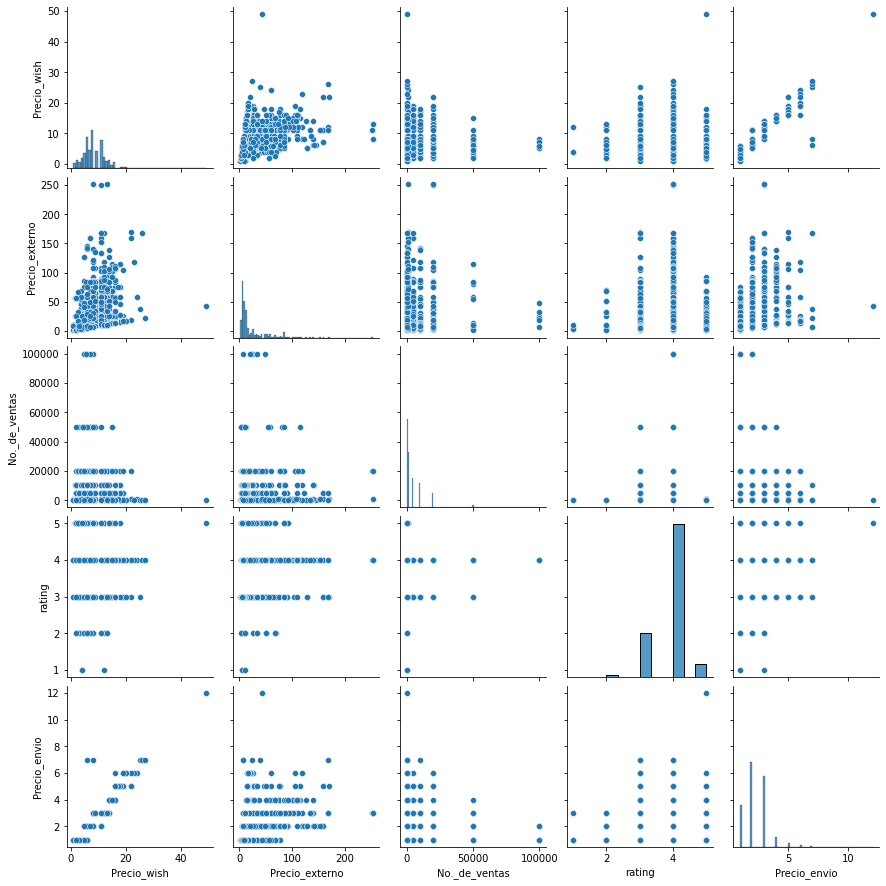

In [34]:
sns.pairplot(bd1[["Precio_wish","Precio_externo","No._de_ventas","rating","Precio_envio"]])

Podemos observar que el precio wish y el precio de envío parecen tener una relación lineal.

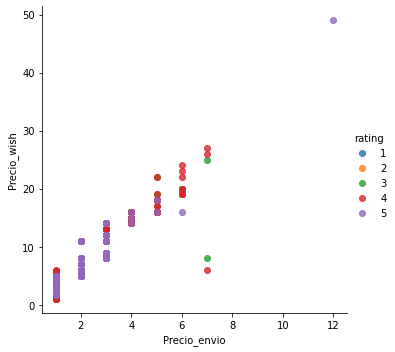

In [35]:
sns.lmplot(x='Precio_envio', y='Precio_wish', hue=('rating'), 
           data=bd1,fit_reg=False)

En la gráfica de arriba observamos la relación entre el precio wish y el precio de envio dividido por colores dependiendo del rating.
* Doble histograma 

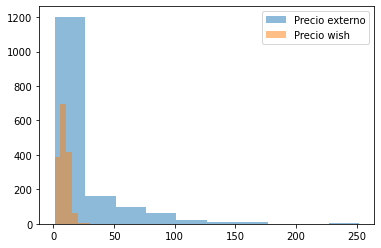

In [36]:
b = bd1["Precio_wish"]
a = bd1["Precio_externo"]

plt.hist(a, alpha = 0.5, label='Precio externo')
plt.hist(b, alpha = 0.5, label='Precio wish')
plt.legend(loc='upper right')

plt.show()

Claramente se ve que el precio externo es mayor que el precio wish.
* Doble boxplot

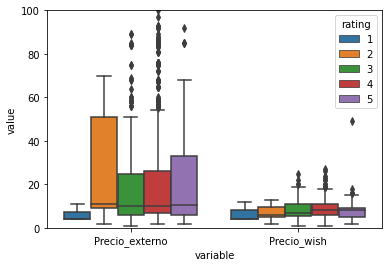

In [37]:
mdata = pd.melt(bd1,id_vars = "rating",value_vars = ['Precio_externo', 'Precio_wish'])
sns.boxplot(x = "variable", y = "value", hue="rating",data= mdata)
plt.ylim(0,100)
plt.show()

Claramente, el precio externo cuenta con demasiados datos atípicos, mientras que el precio wish cuenta con pocos.

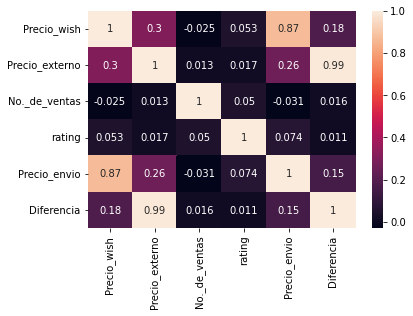

In [38]:
sns.heatmap(bd1.corr(),annot= True)

Con el mapa de calor, nos permite ver la correlación de los datos de una manera más efectiva. Claramente el precio Wish y la diferencia estan relacionadas, al igual que el precio Wish y el precio de envío.

# **Base de datos secundaria**
Amazon Best Seller June 2021 Products

https://www.kaggle.com/hussainaliarif/amazon-best-seller-june-2021-products

### **Limpieza de Datos**

Primero que nada, tenemos que limpiar nuestra base de datos para un mejor manejo.

In [39]:
bd2.isnull().sum() #devuleve la lista de columnas y la cantidad de datos nulos por columna

ASIN             0
Category         0
Product Link     0
No of Sellers    0
Rank             0
Rating           0
Reviews Count    0
Price            0
dtype: int64

A continuación se eliminan las columnas "ASIN", "Product Link", "Rank", ya que no son necesarias para lo que se quiere analizar.

In [40]:
bd2.drop(["ASIN", "Product Link", "Rank"],axis=1,inplace=True)


En la siguiente línea de código se cambian el nombre de las columnas de la base de datos, con uso del atributo rename.

In [41]:
bd2.rename(columns={'Category':'Categoria','No of Sellers':'Vendedores',
                   'Reviews Count':'Reseñas','Price':'Precio'},inplace=True) #con el inplace se hace el cambio "permanente"

#https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas

Vamos a cambiar la columna de categoría para que sea un diccionario y muestre solo los valores.

In [42]:
dict_cat = {'Electronics':"Electronicos",'Clothing, Shoes & Jewelry':"Ropa y joyeria",'Gift Cards':"Tarjetas de regalo",'Books':"Libros",'Video Games':"Videojuegos",'Camera & Photo':"Fotografia",'Toys & Games':"Juguetes"}
bd2['Categoria'] = bd2['Categoria'].map(dict_cat)

Después, se eliminó la palabra "sellers" en la columna Vendedores.

In [43]:
bd2['Vendedores'] = bd2['Vendedores'].str.replace(' Sellers','', regex=True)


Se eliminó el signo $ de la columna precio.

In [44]:
bd2['Precio'] = bd2['Precio'].str.replace('$','', regex=True)

Se eliminó la coma , de la columna reseñas.

In [45]:
bd2['Reseñas'] = bd2['Reseñas'].str.replace(',','', regex=True)

Ahora, convertimos los datos numéricos a int.

In [46]:
bd2['Vendedores']=bd2['Vendedores'].astype(float).astype(int)
bd2['Rating']=bd2['Rating'].astype(float).astype(int)
bd2['Reseñas']=bd2['Reseñas'].astype(float).astype(int)
bd2['Precio']=bd2['Precio'].astype(float).astype(int)

Por último, se muestran los primeros 3 datos de la base de datos ya modificada.

In [47]:
bd2.head(3)

,Categoria,Vendedores,Rating,Reseñas,Precio
0,Electronicos,1,4,640721,39
1,Electronicos,1,4,854114,34
2,Electronicos,1,4,267821,44


### **Estadística básica de los datos**


A continuación, se muestra un resumen estadístico de los precios de los productos vendidos en Amazon.

In [48]:
bd2['Precio'].describe()

count    707.000000
mean      55.005658
std       88.594038
min        0.000000
25%       13.000000
50%       25.000000
75%       50.000000
max      899.000000
Name: Precio, dtype: float64

In [49]:
a=bd2['Precio']
sa=a.cumsum
print("La suma acumulada de los precios fila por fila es :\n",sa)
suma=a.sum()
print("\nLa suma de precios es : ",round(suma,2))
prom=a.mean()
print("El promedio de precios es : ",round(prom,2))
contar=a.count()
print("El número total de datos es : ",round(contar,2))
minimo=a.min()
print("El precio mínimo es : ", round(minimo,2))
maximo=a.max()
print("El precio máximo es : ",round(maximo,2))
mediana=a.median()
print("El precio mediano es : ",round(mediana,2))
varianza=a.var()
print("La varianza es : ",round(varianza,4))
desv=a.std()
print("La desviación estándar es : ",round(desv,4))
sesgo=a.skew()
print("El sesgo es : ",round(sesgo,4))
curtosis=a.kurt()
print("La curtosis es : ",round(curtosis,4))

La suma acumulada de los precios fila por fila es :
 <bound method Series.cumsum of 0      39
1      34
2      44
3      28
4      49
       ..
702     6
703    16
704     8
705    19
706    24
Name: Precio, Length: 707, dtype: int64>

La suma de precios es :  38889
El promedio de precios es :  55.01
El número total de datos es :  707
El precio mínimo es :  0
El precio máximo es :  899
El precio mediano es :  25.0
La varianza es :  7848.9037
La desviación estándar es :  88.594
El sesgo es :  4.7575
La curtosis es :  32.8634


La correlación de los datos es la siguiente.

In [50]:
bd2.corr()

,Vendedores,Rating,Reseñas,Precio
Vendedores,1.000000,-0.018188,-0.097749,0.125699
Rating,-0.018188,1.000000,0.029119,0.007001
Reseñas,-0.097749,0.029119,1.000000,-0.018408
Precio,0.125699,0.007001,-0.018408,1.000000


La covarianza de los datos es la siguiente.

In [51]:
bd2.cov()

,Vendedores,Rating,Reseñas,Precio
Vendedores,428.463487,-0.077425,-3.609801e+05,230.512273
Rating,-0.077425,0.042293,1.068386e+03,0.127559
Reseñas,-360980.118009,1068.385864,3.182922e+10,-290949.612986
Precio,230.512273,0.127559,-2.909496e+05,7848.903651


###**Gráficas datos univariantes**###

* Grafica de barras y datos categoricos

A continuación, analizaremos visualmente el rating de los diferentes productos de Amazon.

In [52]:
bd2['Rating'].unique()

array([4, 5, 3, 1, 2])

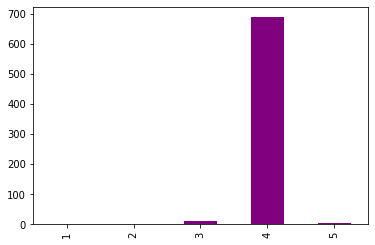

In [53]:
bd2['Rating'].value_counts().sort_index().plot.bar(color='purple')

Claramente, la mayoría de los productos cuentan con un rating de 4 estrellas.

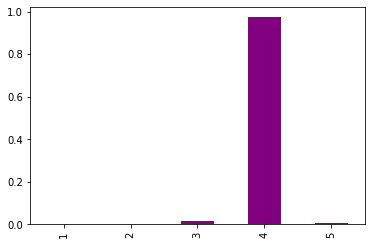

In [54]:
(bd2['Rating'].value_counts() / len(bd2)).sort_index().plot.bar(color='purple')


En la gráfica podemos ver que los productos que tienen un rating de 4 estrellas representan más del 90% de todos los productos.

A continuación, analizaremos la columna categoría.

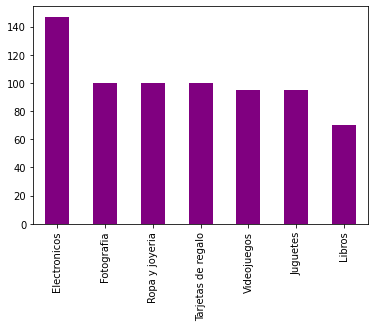

In [55]:
bd2['Categoria'].value_counts().plot.bar(color='purple')

La mayoría de las categorías cuentan con la misma cantidad de productos, a excepción de Electrónicos que tiene más productos a la venta.

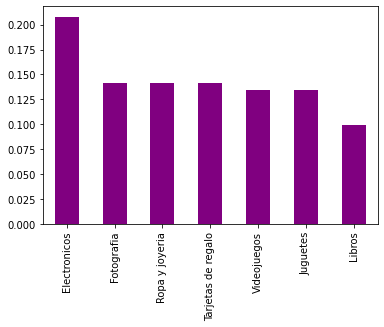

In [56]:
(bd2['Categoria'].value_counts() / len(bd2)).plot.bar(color='purple')


En la gráfica podemos ver que la categoría de electrónicos representa más del 20% de todas las categorías.

**Pregunta 1.**

¿Que representan los datos de la gráfica de arriba?

Representa la proporción del número de productos vendidos en el mes de Junio 2021 por categoría de Amazon.

* Gráfica de lineas

A continuación, analizaremos visualmente el precio de los productos de Amazon.

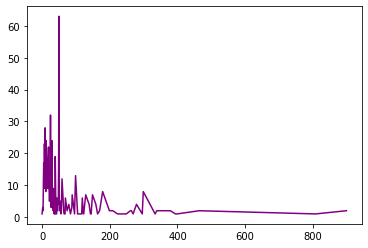

In [57]:
bd2['Precio'].value_counts().sort_index().plot.line(color='purple')

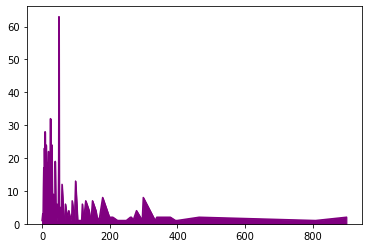

In [58]:
bd2['Precio'].value_counts().sort_index().plot.area(color='purple')

En las gráficas de arriba, se muestra claramente que la mayoría de los productos cuentan con un precio menor a $400.

* Histogramas

En esta sección trabajaremos con la cantidad de vendedores de cada producto.

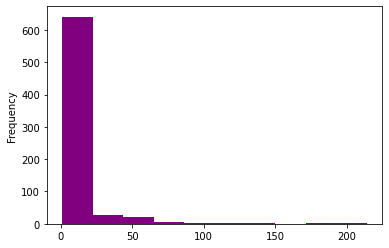

In [59]:
bd2['Vendedores'].plot.hist(color='purple')

Como podemos observar, la gran mayoría de los productos tienen menos de 80 vendedores, y no se puede ver detalladamente los intervalos.

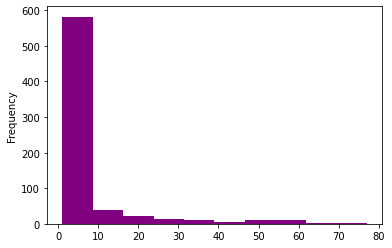

In [60]:
bd2[bd2['Vendedores'] <80]['Vendedores'].plot.hist(color='purple')


Después de haber reducido la gráfica a menos de 80 vendedores, podemos notar que casi de 600 productos cuentan con aproximadamente 1-9 vendedores.

### **Gráficas de datos bi-variantes**



* Scatter plot

En la siguiente gráfica analizaremos el número de vendedores con el precio del producto.

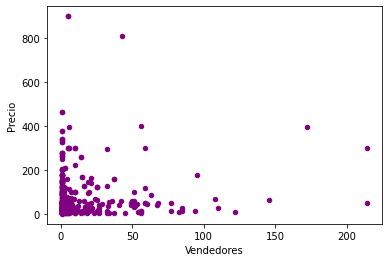

In [61]:
bd2.plot.scatter(x='Vendedores', y='Precio',color='purple')

Analizaremos mejor una muestra de 50 datos debido a que no se aprecia muy bien la gráfica al usar todos los datos.

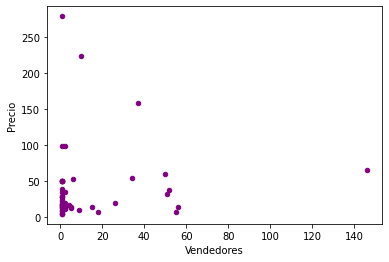

In [62]:
bd2.sample(50).plot.scatter(x='Vendedores', y='Precio',color='purple')

No se puede apreciar ningún patrón entre el número de vendedores y el precio del producto.

* Hexplot

A continuación, seguiremos analizando el número de vendedores con el precio del producto.

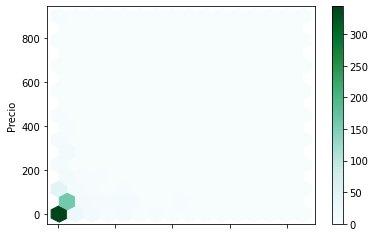

In [63]:
bd2.plot.hexbin(x='Vendedores', y='Precio', gridsize=15)

Aqui podemos ver que se hace un pequeño agrupamiento de precios donde reflejan pocos vendedores.

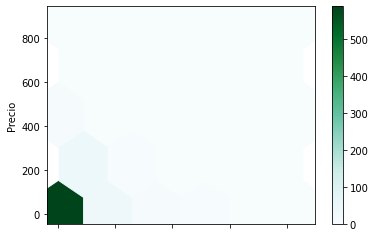

In [64]:
bd2.plot.hexbin(x='Vendedores', y='Precio', gridsize=5)

Cambiandole el tamaño del hexágono, podemos notar como sigue prevaleciendo el color verde oscuro reflejando pocos vendedores.

* Stacked plots

A continuación analizaremos el rating de los productos por categorías.

In [65]:
df=pd.DataFrame(index=["1","2","3","4","5"])

In [66]:
elec=bd2[bd2["Categoria"]=='Electronicos']["Rating"].value_counts()
ropa=bd2[bd2["Categoria"]=='Ropa y joyeria']["Rating"].value_counts()
tar=bd2[bd2["Categoria"]=='Tarjetas de regalo']["Rating"].value_counts()
lib=bd2[bd2["Categoria"]=='Libros']["Rating"].value_counts()
video=bd2[bd2["Categoria"]=='Videojuegos']["Rating"].value_counts()
foto=bd2[bd2["Categoria"]=='Fotografia']["Rating"].value_counts()
jug=bd2[bd2["Categoria"]=='Juguetes']["Rating"].value_counts()

In [67]:
df["Electónicos"]=[0,0,0,145,2]
df["Ropa y Joyería"]=[0,0,0,100,0]
df["Tarjetas de regalo"]=[0,0,0,100,0]
df["Libros"]=[0,0,2,66,2]
df["Videojuegos"]=[1,0,2,91,1]
df["Fotografía"]=[0,1,6,92,1]
df["Juguetes"]=[0,0,1,94,0]

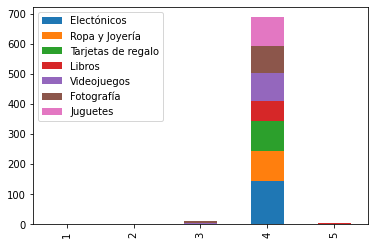

In [68]:
df.plot.bar(stacked=True)

Es evidente que, independientemente la categoría, la mayoría de los productos tienen un rating de 4 estrellas.

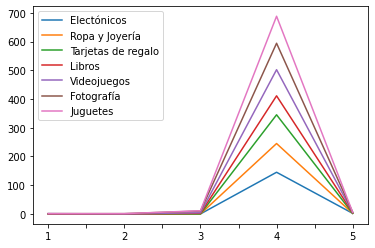

In [69]:
df.plot.line(stacked=True)

La mayoría de los productos tienen un rating de 4 estrellas, sin importar la categoría en la que se encuentre.

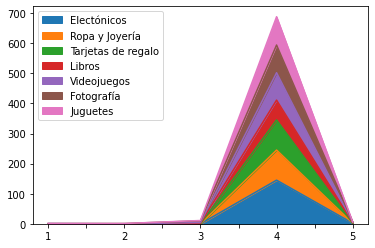

In [70]:
df.plot.area(stacked=True)

La gráfica de arriba es la misma que la pasada, solo que el área esta coloreada. También aquí, la mayoría de los productos tienen un rating de 4 estrellas, sin importar la categoría en la que se encuentre.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


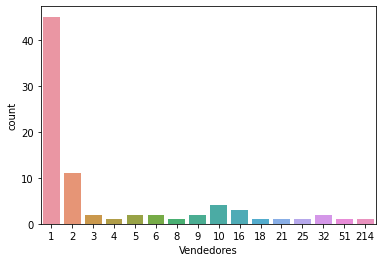

In [71]:
sns.countplot(bd2['Vendedores'].sample(80))

En lugar de la grafica de barras de matplotlib, seaborn tiene countplot y podemos ver como el número de vendedores mas frecuente es de 1.

A continuación, podemos observar la gráfica KDE del precio menor a $400.

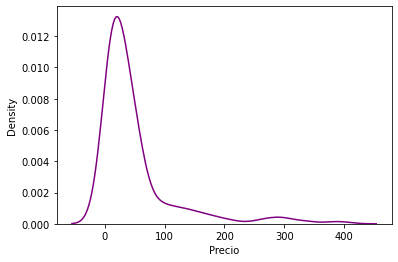

In [72]:
sns.kdeplot(bd2.query('Precio<400').Precio,color="purple")

Comparando la gráfica de abajo con la de arriba, podemos ver como en la gráfica de arriba se eliminó el ruido de los datos y la linea es mas "fina".

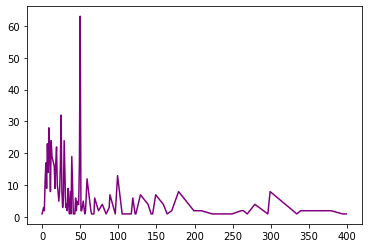

In [73]:
bd2[bd2['Precio'] < 400]['Precio'].value_counts().sort_index().plot.line(color="purple")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


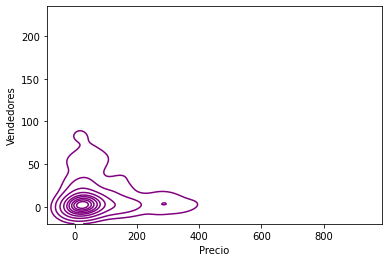

In [74]:
sns.kdeplot(bd2["Precio"],bd2["Vendedores"],color="purple")
#https://es.acervolima.com/2021/02/09/seaborn-kdeplot-una-guia-completa/

Hay una alta concentración de datos cuando el precio está entre 0-100 dólares y cuando el número de vendedores es cercano al 1.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


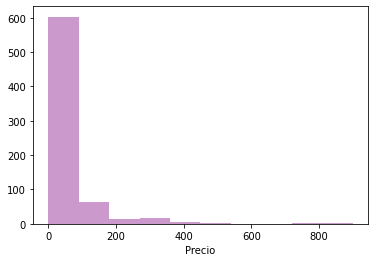

In [75]:
sns.distplot(bd2['Precio'], bins=10, kde=False,color="purple")

Como podemos observar las gráficas de distancias muestran la misma información que los histogramas de la librería matplotlib, la mayoría de los productos están a menos de $100 doláres.

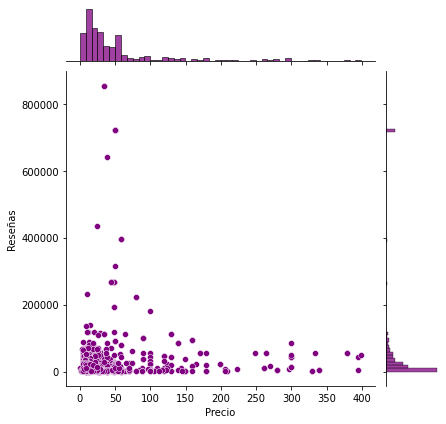

In [76]:
sns.jointplot(x='Precio', y='Reseñas', data=bd2[bd2['Precio'] < 400],color="purple")

La gráfica anterior muestra un scatterplot pero con histogramas de los datos en cada axis de la grafica. El histograma del precio está sesgada a un lado, mismo lado donde podemos encontrar mas puntos en el scatterplot.

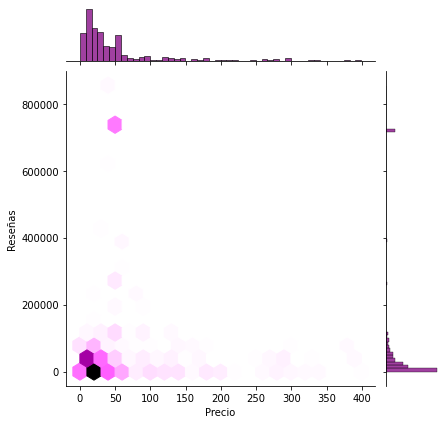

In [77]:
sns.jointplot(x='Precio',y='Reseñas',data=bd2[bd2['Precio'] < 400],kind='hex',gridsize=20, color="purple")

La gráfica anterior muestra un hexplot pero con histogramas de los datos en cada axis de la grafica. Encontramos varios datos con un precio de 25 dólares aproximadamente cuentan con menos de 50,000 reseñas.

* Boxplots

A continuación, graficaremos el precio de wish y el rating.

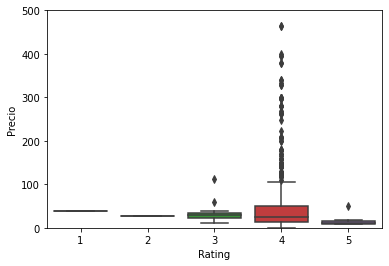

In [78]:
y = bd2[bd2.Rating.isin(bd2.Rating.value_counts().index)]
sns.boxplot(x='Rating',y='Precio',data=y) 
plt.ylim(0,500)
plt.show()

Aqui podemos observar la presencia de datos atípicos entre el rating y el precio. En los rating 1, 2, 5 no se aprecia bien debido a que son muy pocos datos los que entran en estas columnas.

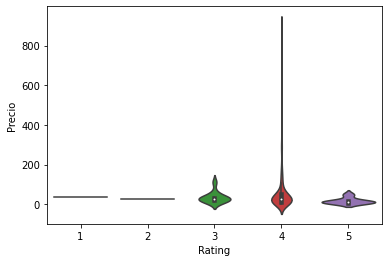

In [79]:
sns.violinplot(
    x='Rating',
    y='Precio',
    data=bd2[bd2.Rating.isin(bd2.Rating.value_counts().index)]
)

La gráfica anterior se utiliza para visualizar la distribución de los datos y su densidad de probabilidad. Por ejemplo, en la gráfica roja se ve que los datos estan sesgados de un lado.

###**Gráficas multi variantes**###


* Matriz de dispersión

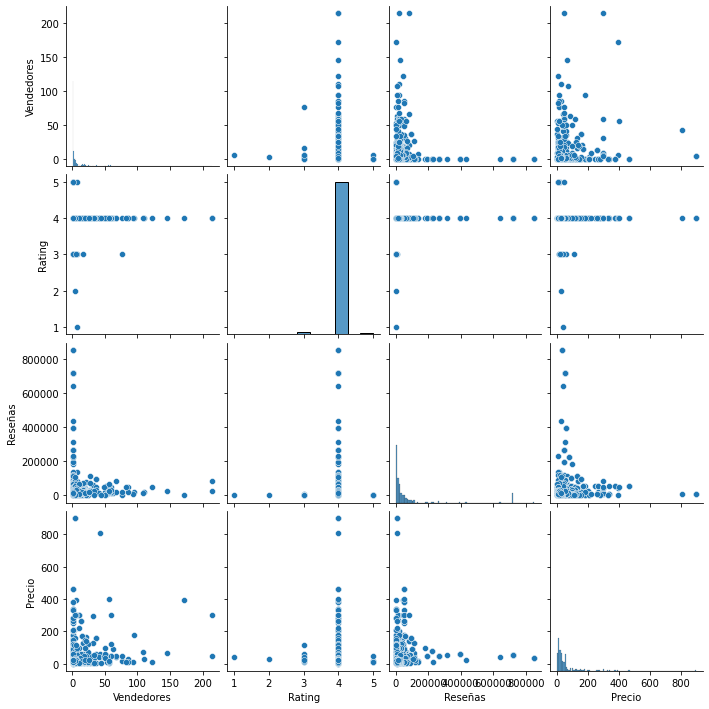

In [80]:
sns.pairplot(bd2)

Podemos observar que la cantidad de reseñas que hay sobre un producto tiene una ligera relación con el precio. Entre más caro es el producto, menos reseñas podemos encontrar.

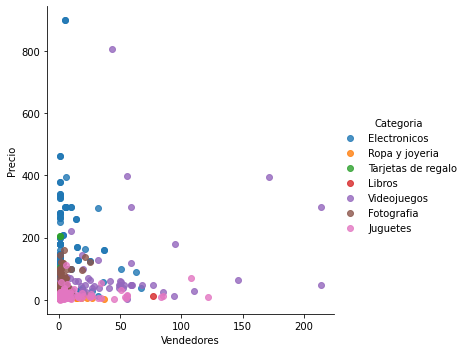

In [81]:
sns.lmplot(x='Vendedores', y='Precio', hue=('Categoria'), data=bd2,fit_reg=False)

En la gráfica de arriba observamos la relación entre el precio  y el número de vendedores dividido por colores dependiendo de la categoría.
* Doble histograma 

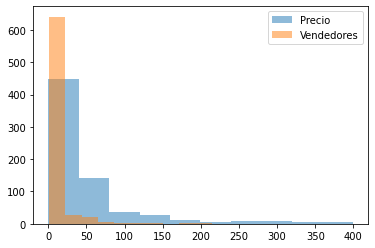

In [82]:
b = bd2["Vendedores"]
a = bd2[bd2['Precio'] <400]['Precio']

plt.hist(a, alpha = 0.5, label='Precio')
plt.hist(b, alpha = 0.5, label='Vendedores')
plt.legend(loc='upper right')
plt.show()

Ambos histogramas estan sesgados a la izquierda pero, el histograma de los vendedores esta más sesgado que el histograma de precio.
* Doble boxplot

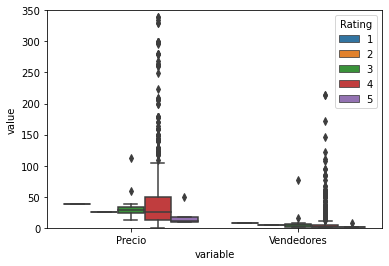

In [83]:
mdata = pd.melt(bd2,id_vars = "Rating",value_vars = ['Precio', 'Vendedores'])
sns.boxplot(x = "variable", y = "value", hue="Rating",data= mdata)
plt.ylim(0,350)
plt.show()

Al tener demasiados datos atípicos, no se alcanzan a apreciar los diferentes boxplots. Tendríamos que quitar dichos datos para tener una mejor visualización.

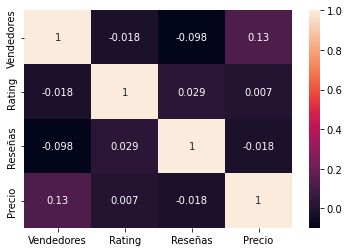

In [84]:
sns.heatmap(bd2.corr(),annot= True)

Con el mapa de calor, nos permite ver la correlación de los datos de una manera más efectiva. No hay ninguna correlación fuerte entre los datos. El número de vendedores y el precio del producto son los datos con mayor correlación de la base de datos.

#**Pregunta**#




¿Qué representan los datos de la gráfica de arriba? (Haciendo referencia a la gráfica de la práctica Jupyter)

La gráfica del Jupyter representa la cantidad de vino agrupado por la puntuación de forma ascendente.

#**Puntos extra**#


* Realizar una o más gráficas (con las mismas o diferentes librerías de las que se utilizaron en este trabajo) diferentes a las que están en la práctica.

La siguiente gráfica de pastel muestra el porcentaje correspondiente al rating de los productos de Wish. Y podemos ver de manera sencilla que la mayoria de los productos vendidos tienen una calificación de 4 estrellas

([<matplotlib.patches.Wedge at 0x7f6e69b93690>,
 [Text(2.159961228978665, 0.012941766068627512, '1 estrella'),
  Text(2.1573081191766943, 0.10780389109078979, '2 estrellas'),
  Text(1.5995034727146777, 1.4516158723208032, '3 estrellas'),
  Text(-1.9024658883046695, -1.0228506947923168, '4 estrellas'),
  Text(2.117063935742498, -0.42853271984585345, '5 estrellas')],
 [Text(1.4399741526524434, 0.008627844045751674, '0.2 %'),
  Text(1.438205412784463, 0.0718692607271932, '1.2 %'),
  Text(1.066335648476452, 0.9677439148805356, '20.7 %'),
  Text(-1.268310592203113, -0.681900463194878, '71.6 %'),
  Text(1.4113759571616653, -0.2856884798972356, '6.4 %')])

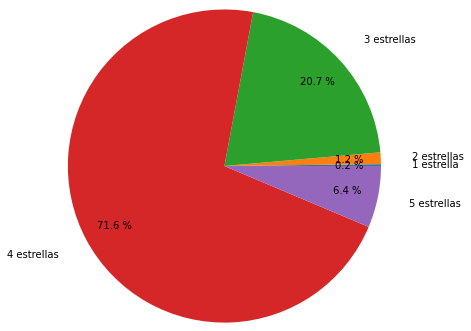

In [86]:
labels = ['1 estrella', '2 estrellas', '3 estrellas', '4 estrellas', '5 estrellas']
plt.pie(bd1["rating"].value_counts().sort_index(), labels=labels, autopct="%0.1f %%",radius=1.8,pctdistance=0.8,labeldistance=1.2)


In [87]:
import plotly.graph_objects as go

labels = ['1 estrella', '2 estrellas', '3 estrellas', '4 estrellas', '5 estrellas']
values = bd1["rating"].value_counts().sort_index()

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

* Realizar una comparacion entre dos gráficas diferentes que parezcan dar la misma información. Cual es mejor en cual caso y explicar porque.

Arriba realizamos una gráfica de barras y una gráfica de pastel. Ambas muestran el porcentaje correspondiente al rating de los productos de Wish. En este caso, nosotros consideramos que la gráfica de pastel es mejor debido a que es más fácil de comprender visualmente. Se reconoce con rapidez que estamos hablando de proporciones. 

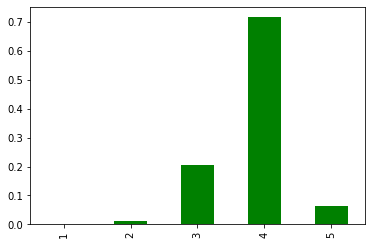

In [88]:
(bd1['rating'].value_counts() / len(bd1)).sort_index().plot.bar(color='g')

([<matplotlib.patches.Wedge at 0x7f6e67737c10>,
 [Text(2.159961228978665, 0.012941766068627512, '1 estrella'),
  Text(2.1573081191766943, 0.10780389109078979, '2 estrellas'),
  Text(1.5995034727146777, 1.4516158723208032, '3 estrellas'),
  Text(-1.9024658883046695, -1.0228506947923168, '4 estrellas'),
  Text(2.117063935742498, -0.42853271984585345, '5 estrellas')],
 [Text(1.4399741526524434, 0.008627844045751674, '0.2 %'),
  Text(1.438205412784463, 0.0718692607271932, '1.2 %'),
  Text(1.066335648476452, 0.9677439148805356, '20.7 %'),
  Text(-1.268310592203113, -0.681900463194878, '71.6 %'),
  Text(1.4113759571616653, -0.2856884798972356, '6.4 %')])

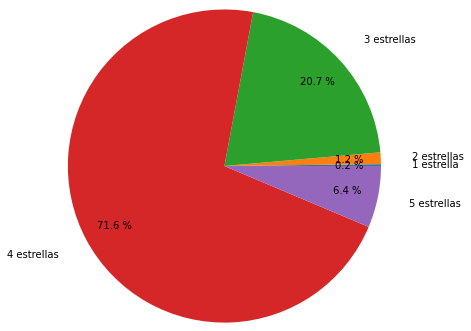

In [89]:
labels = ['1 estrella', '2 estrellas', '3 estrellas', '4 estrellas', '5 estrellas']
plt.pie(bd1["rating"].value_counts().sort_index(), labels=labels, autopct="%0.1f %%",radius=1.8,pctdistance=0.8,labeldistance=1.2)


In [90]:
import plotly.graph_objects as go

labels = ['1 estrella', '2 estrellas', '3 estrellas', '4 estrellas', '5 estrellas']
values = bd1["rating"].value_counts().sort_index()

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

#https://plotly.com/python/pie-charts/